# Подводные камни объединения таблиц
Что следует проверить:
- Есть ли дубликаты среди комбинаций столбцов, по которым объединяем (в примере ниже это один столбец user; если столбцов объединения несколько, то смотрим дубликаты в комбинации)
- Если после объединения таблиц не предполагается дубликатов, то проверьте число строк до и после объединения.
- При объединении типа left строки левой таблицы всегда остаются в результате. Правой - не факт. Можно проверить суммы числовых столбцов до и после объединения. Либо уникальные значения категориальных столбцов.

In [13]:
import pandas as pd

In [14]:
left = pd.DataFrame({
    'user': [1, 2, 3, 4, 1],
    'calls': [10, 20, 30, 40, 50],
})
left

,user,calls
0,1,10
1,2,20
2,3,30
3,4,40
4,1,50


In [15]:
right = pd.DataFrame({
    'user': [2, 3, 4, 5, 6],
    'internet': [0.5, 0.4, 0.3, 0.2, 0.1],
})
right

,user,internet
0,2,0.5
1,3,0.4
2,4,0.3
3,5,0.2
4,6,0.1


Планируем объединять таблицы по столбцу user. Проверим дубликаты:

In [16]:
left[left.user.duplicated()]

,user,calls
4,1,50


Можно так

In [17]:
left.user.value_counts()

1    2
4    1
3    1
2    1
Name: user, dtype: int64

Что делать с посторяющимися ключами объединения:
- дублирующиеся строчки можно удалить
- в нашем случае их логичнее сложить

In [18]:
left_no_duplicates = left.groupby('user').sum().reset_index()
left_no_duplicates

,user,calls
0,1,60
1,2,20
2,3,30
3,4,40


Попробуем объединить типом left:

In [19]:
left_join = left_no_duplicates.merge(right, on='user', how='left')
left_join

,user,calls,internet
0,1,60,NaN
1,2,20,0.5
2,3,30,0.4
3,4,40,0.3


С точки зрения левой таблицы проблем нет:

In [20]:
len(left_no_duplicates) == len(left_join)

True

In [21]:
left_no_duplicates.calls.sum() == left_join.calls.sum()

True

Но для правой таблицы часть данных потеряна:

In [22]:
right.internet.sum() == left_join.internet.sum()

False

Чтобы не потерять данные используем outer join:

In [23]:
outer_join = left_no_duplicates.merge(right, on='user', how='outer')
outer_join

,user,calls,internet
0,1,60.0,NaN
1,2,20.0,0.5
2,3,30.0,0.4
3,4,40.0,0.3
4,5,NaN,0.2
5,6,NaN,0.1


Проверка с совпадением числа строк теперь теряет смысл

In [24]:
len(left_no_duplicates) == len(outer_join)

False

А вот суммы должны сходиться

In [25]:
left_no_duplicates.calls.sum() == outer_join.calls.sum()

True

In [26]:
right.internet.sum() == outer_join.internet.sum()

True

### Пример посложнее
Как бы вы объединили таблицу визитов и покупок?

In [27]:
visits = pd.DataFrame(
    {'date': ['2019-11-01', '2019-11-01', '2019-11-02', '2019-11-02', '2019-11-03'], 
     'source': ['organic', 'paid', 'organic', 'paid', 'organic'], 
     'visits': [16825, 1952, 21890, 376, 19509]}
)
visits

,date,source,visits
0,2019-11-01,organic,16825
1,2019-11-01,paid,1952
2,2019-11-02,organic,21890
3,2019-11-02,paid,376
4,2019-11-03,organic,19509


In [28]:
orders = pd.DataFrame(
    {'date': ['2019-11-01', '2019-11-02', '2019-11-03'],
     'orders': [198, 225, 201]}
)
orders

,date,orders
0,2019-11-01,198
1,2019-11-02,225
2,2019-11-03,201


# Папки для хранения данных
Вариант с верхнеуровневыми папками иногда вызывает ошибки в работе систем. Вложенные папки лучше. Обращайте внимание на случаи, если ваш код запускается из другой папки (например, домашней директории).

Хранение данных
- Репозиторий с кодом должен содержать минимальное количество данных. Git и прочие системы контроля версий плохо работают с большими файлами и с большим количеством файлов. Но есть сервис [git-lfs](https://git-lfs.github.com/)
- На открытые данные можно дать ссылку
- Для более конфиденциальных данных можно использовать хранилища вроде Я.Диска и Google Drive. У них есть настройки доступов
- Хранение персональных данных и сведений, составляющих коммерческую тайну, должно быть организовано профессионально

In [ ]:
# на windows путь указывается немного по-другому:

pd.read_csv('C:\\Users\\kbashevoy\\Downloads\\data.csv')
pd.read_csv(r'C:\Users\kbashevoy\Загрузки\data.csv')

In [ ]:
df = pd.read_csv('data/part_1/data.csv')

# Определение нормальности распределения

In [30]:
from scipy import stats
import matplotlib.pyplot as plt

Пример с t-распределением (должно расходиться с нормальным по краям)

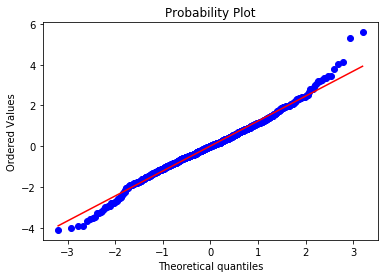

In [31]:
x = stats.t.rvs(5, size=1000)
res = stats.probplot(x, plot=plt)

Пример с нормальным распределением. Должна получиться прямая

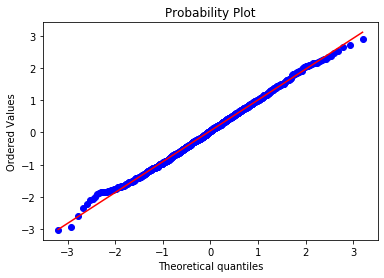

In [32]:
x = stats.norm.rvs(size=1000)
res = stats.probplot(x, plot=plt)

# Logging

Что было бы круто:
* сообщения выводятся на экран в Jupyter notebook без задержек (как это иногда бывает у print)
* сообщения автоматом пишутся в файл в едином формате (например, когда скрипт выполняется по расписанию)
* понятно какой скрипт, на какой строке и какой тип сообщения выдал (INFO, WARNING, ERROR)

In [33]:
float('aaa')

ValueError: could not convert string to float: 'aaa'

In [ ]:
with open('error.log') as f:
    f.write('...')

In [34]:
# https://docs.python.org/3.7/library/logging.html
import logging

In [35]:
logger = logging.getLogger('Тест логгера')

# в какой файл пишем логи
hdlr = logging.FileHandler('error.log', mode = 'w')

# что будем писать в файл
# https://docs.python.org/3.7/library/logging.html#logrecord-attributes
formatter = logging.Formatter('%(asctime)s [LINE:%(lineno)d] %(levelname)s %(message)s')

hdlr.setFormatter( formatter )
logger.addHandler( hdlr )
logger.setLevel(logging.INFO)

In [36]:
data = [ 1, 55, 'abc', 12 ]

In [37]:
for num in data:
    # проверяем входные данные на целое число
    if isinstance( num, int ):
        logger.info( 'Строка норм {}'.format(num) )
    
    else:
        logger.warning( 'Некорректное значение. Значение было {}'.format(num) )

Пример с логированием ошибок

In [38]:
total_sum = 0

for num in data:
    # проверяем входные данные на целое число
    try:
        total_sum += num
        logger.info( 'Строка норм {}'.format(num) )
    
    except Exception as e:
        logger.warning('Некорректное значение. Значение было {}. Ошибка: {}'.format(num, e))

Наконец, логирование полного текста ошибки

In [39]:
import traceback

In [40]:
total_sum = 0

for num in data:
    # проверяем входные данные на целое число
    try:
        total_sum += num
        logger.info( 'Строка норм {}'.format(num) )
    
    except:
        logger.warning('Некорректное значение. Значение было {}. Ошибка: \n{}'.format(num, traceback.format_exc()))
        